In [2]:
!pip install -q  langchain-openai==0.1.8 langchain_community==0.2.4 tiktoken==0.7.0 langchain==0.2.3
!pip install -q  faiss-cpu==1.8.0 wikipedia==1.4.0 arxiv==2.1.0


In [3]:
from google.colab import userdata
openai_api_key = userdata.get('openai_api_key')


In [4]:

from langchain_openai  import ChatOpenAI
from langchain.schema import SystemMessage, HumanMessage,AIMessage, StrOutputParser
from langchain.prompts import PromptTemplate, ChatPromptTemplate, MessagesPlaceholder
llm = ChatOpenAI(openai_api_key=openai_api_key, model='gpt-4-1106-preview', temperature=0)



In [5]:
prompt = ChatPromptTemplate.from_messages(
  [
    (
      "system", "You are a helpful assistant",
    ),
    ("user", "{text}"),
  ]
)

In [6]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant",
        ),
        MessagesPlaceholder(variable_name="chat_history"),
        ("user", "{text}"),
    ]
)


In [7]:
chain = prompt | llm | StrOutputParser()

In [8]:
chat_history = []



In [9]:
i = -1

texts = ["I am an LLM specialist who is an expert in LangChain",
         "What is my area of expertise?",
         """Please provide some questions that the LLM (Language Model) may not be proficient at answering,
          but Wikipedia would be well-suited to address."""
         ,""""Who won the Asian National Cup in 2023?""",
         " i want o record a 80 second video to introduce my courese about LangChain. and its application, why we should learn it? why its important to learn? who should learn it?"
         , "No. my friend Langchain is a framework to work with llm. it s not about blockchain or etc. rewrite your previouse answer",
         'you did well. but consider absolutly beginner  and start with some bassic information maybe they do not know llms but they know chatgpt. so use this fact and change: also consider langchain is  a framework to work with llm',
         "can i mention a search engine in langchain application?"]

text = texts[i]
# chat_history = chat_history[-3:]
response_message = chain.invoke({'chat_history':chat_history, 'text':text})
response_message


"Yes, you can mention a search engine in a LangChain application or any other application, as long as you are not using the name or trademarks of the search engine in a way that would infringe on the search engine's intellectual property rights or in a manner that is misleading or suggests an endorsement or partnership when there isn't one.\n\nIf you're developing an application and want to reference a search engine for functionality purposes (e.g., to indicate that your application can perform searches using that engine), it's generally acceptable to mention the search engine by name, provided you respect their terms of service and any usage guidelines they have for their name and trademarks.\n\nHowever, if you're planning to use the search engine's services or data within your application, you should ensure that you comply with their API usage terms and conditions. Many search engines provide APIs for developers and have specific rules about how their services can be used within appl

In [10]:
chat_history.extend([HumanMessage(content=text), AIMessage(content=response_message)])
chat_history

[HumanMessage(content='can i mention a search engine in langchain application?'),
 AIMessage(content="Yes, you can mention a search engine in a LangChain application or any other application, as long as you are not using the name or trademarks of the search engine in a way that would infringe on the search engine's intellectual property rights or in a manner that is misleading or suggests an endorsement or partnership when there isn't one.\n\nIf you're developing an application and want to reference a search engine for functionality purposes (e.g., to indicate that your application can perform searches using that engine), it's generally acceptable to mention the search engine by name, provided you respect their terms of service and any usage guidelines they have for their name and trademarks.\n\nHowever, if you're planning to use the search engine's services or data within your application, you should ensure that you comply with their API usage terms and conditions. Many search engines

In [11]:
prompt.format(text=texts[1], chat_history=chat_history)

"System: You are a helpful assistant\nHuman: can i mention a search engine in langchain application?\nAI: Yes, you can mention a search engine in a LangChain application or any other application, as long as you are not using the name or trademarks of the search engine in a way that would infringe on the search engine's intellectual property rights or in a manner that is misleading or suggests an endorsement or partnership when there isn't one.\n\nIf you're developing an application and want to reference a search engine for functionality purposes (e.g., to indicate that your application can perform searches using that engine), it's generally acceptable to mention the search engine by name, provided you respect their terms of service and any usage guidelines they have for their name and trademarks.\n\nHowever, if you're planning to use the search engine's services or data within your application, you should ensure that you comply with their API usage terms and conditions. Many search eng

In [12]:
texts[1]

'What is my area of expertise?'

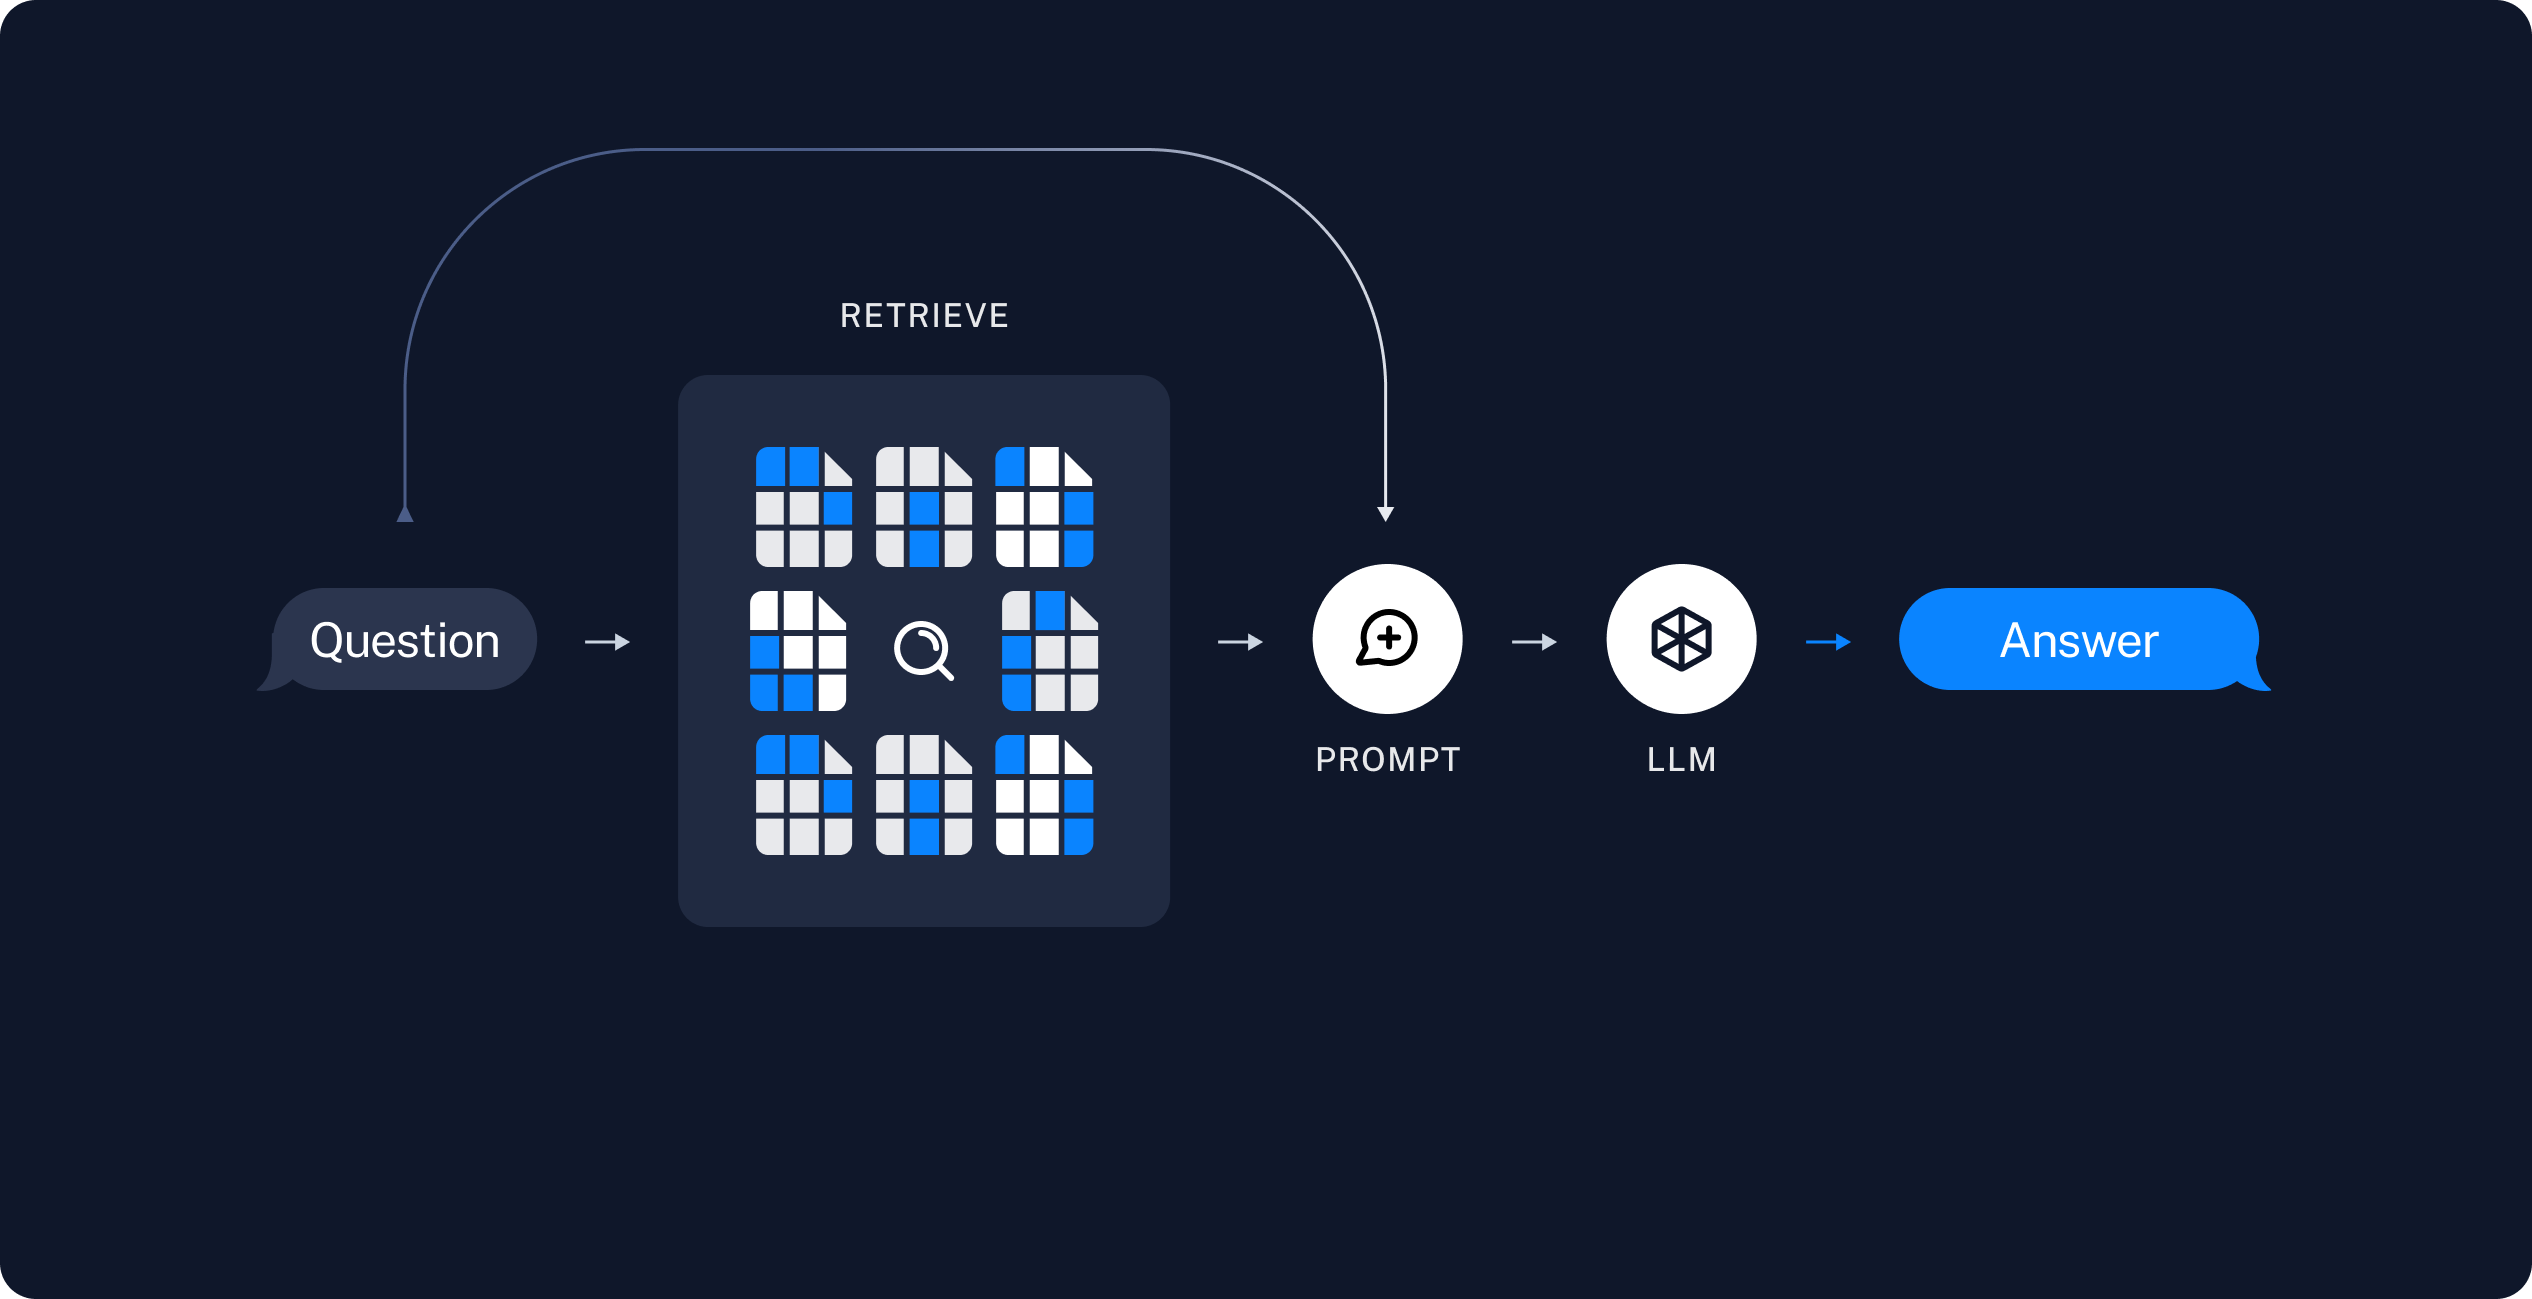

In [13]:
from langchain.retrievers import WikipediaRetriever
from langchain.retrievers import ArxivRetriever

In [14]:
retriever = WikipediaRetriever(load_max_docs=1)
# retriever = ArxivRetriever(load_max_docs=2)

In [15]:
text = texts[3]
text

'"Who won the Asian National Cup in 2023?'

In [16]:
llm.invoke([HumanMessage(text)])

AIMessage(content="As of my last update in April 2023, the Asian National Cup, which I assume you are referring to as the AFC Asian Cup, had not taken place in 2023. The AFC Asian Cup is organized by the Asian Football Confederation (AFC), and the most recent tournament was held in 2019, with Qatar emerging as the champions.\n\nThe next AFC Asian Cup was scheduled for 2023 and was initially awarded to China. However, China withdrew as hosts due to the COVID-19 pandemic, and the AFC announced in October 2022 that the tournament would be moved to a new location. As of my last update, the new host had not been announced, and the tournament's status might have changed since then.\n\nPlease check the latest updates from the AFC or other reliable news sources for the most current information on the AFC Asian Cup and its winners.", response_metadata={'token_usage': {'completion_tokens': 177, 'prompt_tokens': 19, 'total_tokens': 196}, 'model_name': 'gpt-4-1106-preview', 'system_fingerprint': N

In [21]:
# docs = retriever.get_relevant_documents(query='attention is all you need')
docs = retriever.get_relevant_documents(query='Who won the Asian National Cup in 2023?')




In [22]:
docs

[Document(page_content="The 2023 AFC Asian Cup, also called the Asian Cup 2023 was the 18th edition of the AFC Asian Cup, the quadrennial international football tournament organised by the Asian Football Confederation (AFC). It involved 24 national teams after its expansion in 2019, with the host Qatar- the defending champions.\nOn 17 October 2022, the AFC announced that the tournament would be held in Qatar, replacing the original host China. Due to the high summer temperatures and Qatar's participation in the 2023 CONCACAF Gold Cup, the tournament was postponed to 12 January – 10 February 2024, while retaining the original name for both existing sponsorship and logistical purposes.\nHosts and defending champions Qatar successfully retained their title, defeating Jordan 3–1 in the final.\n\n\n== Host selection ==\n\nChina was acclaimed as the host country on 4 June 2019, as sole finishing bidder, days just prior to the 69th FIFA Congress in Paris, France. The tournament was originally

In [23]:
from langchain.chains import ConversationalRetrievalChain
from langchain_openai import ChatOpenAI


qa = ConversationalRetrievalChain.from_llm(llm, retriever=retriever)

In [24]:
qa.invoke({'question': 'Who won the Asian National Cup in 2023?', 'chat_history':[]})

{'question': 'Who won the Asian National Cup in 2023?',
 'chat_history': [],
 'answer': 'Qatar won the Asian National Cup in 2023, successfully retaining their title by defeating Jordan 3–1 in the final.'}

In [25]:
from langchain.document_loaders import AsyncHtmlLoader
import pandas as pd
df = pd.read_excel('/content/urls.xlsx')
urls = df['url'].values.tolist()
urls[:5]

['https://plantix.net/en/library/plant-diseases/100323/anthracnose/',
 'https://plantix.net/en/library/plant-diseases/500008/yellow-vine-mite/',
 'https://plantix.net/en/library/plant-diseases/100348/ring-spot-of-sugarcane/',
 'https://plantix.net/en/library/plant-diseases/100213/lentil-rust/',
 'https://plantix.net/en/library/plant-diseases/800049/physiological-leaf-spot/']

In [26]:
loader = AsyncHtmlLoader(urls[:5])
docs = loader.load()

Fetching pages: 100%|##########| 5/5 [00:00<00:00, 13.55it/s]


In [27]:
docs[0]

Document(page_content='<!DOCTYPE html><html lang="en" dir="ltr"><head>\n    <meta charset="utf-8">\n    <base href="/en/library/">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <link rel="preconnect" href="https://content.peat-cloud.com">\n    <link rel="icon" type="image/png" href="https://plantix.net/en/library/favicon.png">\n    <link rel="shortcut icon" type="image/x-icon" href="https://plantix.net/en/library/favicon.ico">\n    <script>\n      !function(e){"function"==typeof define&&define.amd?define(e):e()}((function(){"use strict";\n      !function(e){var t=e.performance;function n(e){t&&t.mark&&t.mark(e)}function r(e,n){t&&t.measure&&t.measure(e,n)}n("Zone");var o=e.__Zone_symbol_prefix||"__zone_symbol__";function a(e){return o+e}var i=!0===e[a("forceDuplicateZoneCheck")];if(e.Zone){if(i||"function"!=typeof e.Zone.__symbol__)throw new Error("Zone already loaded.");return e.Zone}var c=function(){function t(e,t){this._parent=e,this._name=t?t.name||

In [28]:
from langchain_community.document_transformers import BeautifulSoupTransformer
tags = ["p", "li", 'div']
html = docs[0].page_content
bs_transformer = BeautifulSoupTransformer()
docs_transformed = bs_transformer.transform_documents(
    docs, tags_to_extract=tags
)

In [29]:
docs_transformed[0]

Document(page_content='App Library News Company API    Business       Get the app     Anthracnose  Library   Pests & Diseases      Anthracnose Turmeric      Anthracnose Colletotrichum spp. Fungus Heal your crop Take a picture See diagnosis Get medicine Get Plantix app In a Nutshell Water-soaked lesions on leaves, stems, pods or fruits. Oval lesions surrounded by vividly colored margin. The lower stem dark-brown and rough. Defoliation, lodging of plants or top die back of branches in severe cases.  Can also be found in  25 Crops  Almond   Apple     Apricot   Banana     More   Turmeric    Symptoms Type of crop, variety and environmental conditions will influence the severity of symptoms. Gray to tan-coloured lesions appear on leaves, stems, pods or fruits. These spots can be circular, oval or irregular in shape and with dark brown, reddish or purplish margins. Under favorable weather conditions, they become more numerous, enlarge and coalesce, turning dark brown or black in the process. 

In [33]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=20)

text_chunks = text_splitter.split_documents(docs_transformed)



In [34]:
len(text_chunks)

13

In [35]:

from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(openai_api_key=openai_api_key)


In [36]:

from langchain.vectorstores import FAISS
vs = FAISS.from_documents(text_chunks, embedding)


In [ ]:
# vs.save_local('/content/drive/MyDrive/plantix/plantix_faiss')

In [ ]:
vs = FAISS.load_local('/content/drive/MyDrive/plantix/plantix_faiss', embedding)
vs.similarity_search('aster yellows phytoplasma', k=3)

[Document(page_content='App Library News Company API     Get the app    Aster Yellows Phytoplasma  Library   Pests & Diseases      Aster Yellows Phytoplasma Melon      Aster Yellows Phytoplasma Phytoplasma asteris Bacteria 5 mins to read Heal your crop Take a picture See diagnosis Get medicine Get Plantix app In a Nutshell Clearing of the leaf veins that extends to the rest of the leaf blade. Deformation and greening of flowers, development of leaf-like flower petals and formation of sterile flowers. Overall, plants have a reduced root system and a stunted appearance.  Can also be found in  6 Crops  Bitter Gourd   Cabbage    Maize    Melon     More   Melon    Symptoms The range of characteristic symptoms varies slightly depending on strain of phytoplasma in question, the age of the plant during the infection, the plant species and environmental factors such as temperature and humidity. The symptoms can easily be mistaken for herbicide damage and usually start with the clearing of the v

In [37]:

def _create_chain(prompt, llm, db):
  chain = (RunnableParallel(
    {"context": itemgetter("question") | db.as_retriever(search_kwargs={"k": 3}), 'question': RunnablePassthrough()}
    ) | prompt | llm)
  return chain

In [38]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from operator import itemgetter

In [39]:
prompt = ChatPromptTemplate.from_messages([
  ('system', "You are a helpful assistant please answer based on your {context}"),
  ('user', '{question}')

])
chain = _create_chain(prompt, llm, vs)

In [40]:
j = 1
queries = [
    "What is the primary cause of aster yellows-phytoplasma in plants?",
    'Which plants are commonly affected by aster yellows phytoplasma?',
    'How does aster yellows-phytoplasma spread from plant to plant?',
    'Are there any specific symptoms or signs that indicate the presence of aster yellows-phytoplasma in plants?',
         ' What are the potential economic impacts of aster yellows-phytoplasma on crop yields?',
           'what are the recommended control measures for managing aster yellows-phytoplasma in affected crops?'
]
query  = queries[j]
chain.invoke({'question': query,})

AIMessage(content='The documents provided do not contain information about aster yellows phytoplasma or the plants commonly affected by it. However, based on what is known about aster yellows, it is a disease caused by a bacterium-like organism called a phytoplasma. This disease can affect over 300 species of plants, including many vegetables (such as carrots, lettuce, and onions), ornamentals (like asters, marigolds, and chrysanthemums), and several weeds (like dandelions and plantains). The symptoms often include yellowing of leaves, stunted growth, and the production of abnormal flowers or structures. The disease is spread by leafhoppers, which transfer the phytoplasma from infected to healthy plants.', response_metadata={'token_usage': {'completion_tokens': 151, 'prompt_tokens': 1643, 'total_tokens': 1794}, 'model_name': 'gpt-4-1106-preview', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-47ff7e64-ca93-4f7c-a9c2-d69e42e83b49-0', usage_metadata={'inp

In [41]:
llm.invoke([SystemMessage('you are a helpful assistant'), HumanMessage(query)])

AIMessage(content='Aster yellows is a plant disease caused by a bacterium-like organism called a phytoplasma. This disease can affect over 300 species of plants in more than 40 families. Plants commonly affected by aster yellows phytoplasma include a wide range of vegetables, ornamentals, and weeds. Here are some of the plants that are often impacted:\n\n1. Vegetables:\n   - Carrots: Symptoms include yellowing and reddening of the foliage, stunted growth, and hairy roots.\n   - Lettuce: Infected plants may show reddening of leaves and stunted growth.\n   - Celery: Infected celery may have yellow to reddish-purple discoloration, stunted growth, and a proliferation of shoots.\n   - Onions: Onion plants may develop white, stunted bulbs and twisted leaves.\n   - Tomatoes: Symptoms include yellowing of the leaves, stunted growth, and flower abnormalities.\n\n2. Ornamental plants:\n   - Asters: As the name suggests, asters can be severely affected, showing stunted growth and malformed flower

In [42]:

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant who answers only based on its {context}",
        ),
        MessagesPlaceholder(variable_name="chat_history"),
        ("user", "{question}"),
    ]
)

chain = (RunnableParallel(
    {"context": itemgetter("question") | vs.as_retriever(search_kwargs={"k": 2}),
     'question': RunnablePassthrough(),"chat_history": lambda x: x['chat_history']}
    ) | prompt | {'out_put': llm.with_config(temprature=0.2) | StrOutputParser()})


In [43]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
  chain.invoke({'question':query, 'chat_history':[]})

In [44]:
print(cb)

Tokens Used: 1186
	Prompt Tokens: 1091
	Completion Tokens: 95
Successful Requests: 1
Total Cost (USD): $0.01376


In [ ]:
# from langchain.memory import ConversationSummaryBufferMemory
# # from langchain.llms import OpenAI

# # llm = OpenAI()

# memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=2000)
# memory.save_context({"input": "hi"}, {"output": "whats up"})
# memory.save_context({"input": "not much you"}, {"output": "not much"})

# memory.load_memory_variables({})

# messages = memory.chat_memory.messages
# previous_summary = ""
# memory.predict_new_summary(messages, previous_summary)

In [45]:
from operator import itemgetter
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
retrieval_chain = prompt | llm | StrOutputParser()
from langchain.agents import AgentExecutor, OpenAIFunctionsAgent
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    vs.as_retriever(), "palntix", "Search for palnts diseases"
)

In [48]:
tools = [retriever_tool]
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant who helps farmers",
        ),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
        ("user", "{input}"),
    ]
)
agent = OpenAIFunctionsAgent(
    llm=llm, prompt=prompt, tools=tools
)
agent_executor = AgentExecutor(
    agent=agent, tools=tools, max_iterations=5, early_stopping_method="generate"
) | (lambda x: x["output"])

In [49]:
agent_executor.invoke({'input':query, 'chat_history':[]})

'Aster yellows phytoplasma is a disease that affects a wide range of plant species, particularly those in the Asteraceae family. However, it can also impact various other ornamental, vegetable, and cereal crops. Here are some of the plants commonly affected by aster yellows:\n\n1. **Asteraceae Family**: This includes plants such as asters, marigolds, chrysanthemums, and daisies.\n2. **Vegetables**: Carrots, lettuce, celery, parsley, and onions can be affected.\n3. **Cereal Crops**: Barley and wheat may also show symptoms of the disease.\n4. **Weeds**: Weeds like dandelions and plantain can harbor the phytoplasma and serve as a reservoir for the disease.\n5. **Other Ornamentals**: Plants such as purple coneflower (Echinacea spp.), coreopsis, and zinnias.\n\nThe disease is spread by leafhoppers, which can transmit the phytoplasma as they feed on the sap of infected plants and then move on to healthy ones. Symptoms of aster yellows include yellowing of leaves, stunted growth, and the prod

In [50]:
dir(agent_executor)

['Config',
 'InputType',
 'OutputType',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__config__',
 '__custom_root_type__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__exclude_fields__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__include_fields__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__json_encoder__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__orig_bases__',
 '__parameters__',
 '__post_root_validators__',
 '__pre_root_validators__',
 '__pretty__',
 '__private_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '__repr_str__',
 '__rich_repr__',
 '__ror__',
 '__schema_cache__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__try_update_forward_ref